# Desafio Técnico PDI 

📌 **OBJETIVO** - Considerando que a imagem em questão (encarte de supermercado) será processada por algoritmos de PDI e NLP, você como desenvolverdor do time de processamento de imagens tem a missão de aplicar à imagem algoritmos de pré-processamentos com o objetivo de destacar as regiões de interesse sabendo que cada oferta (nome e preço do produto) serão extraídos pelo time de NLP. Agora é com você, dev PDI ! Dado a imagem em anexo, escreva um código para aplicar os melhores pré-processamentos possíveis, preparando a imagem para o time de NLP.

> NUVEN - Núcleo de Visão Computacional e Engenharia

> Processo seletivo para a vaga **Desenvolvedor(a) em Processamento de Imagens**

> Andressa Gomes Moreira

## Teste Reconhecimento de Caracteres

> Teste utilizando a ferramenta Pytesseract para reconhecimento dos caracteres referente ao nome dos produtos.

**Importações**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Importação Pytesseract**

* Pytesseract é uma ferramenta de reconhecimento óptico de caracteres (OCR) para Python. Ou seja, ele reconhecerá e “lerá” o texto embutido nas imagens.

* É necessário passar o caminho do pytesseract do seu computador

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR\Tesseract.exe"

**Carregando a imagem para o teste**

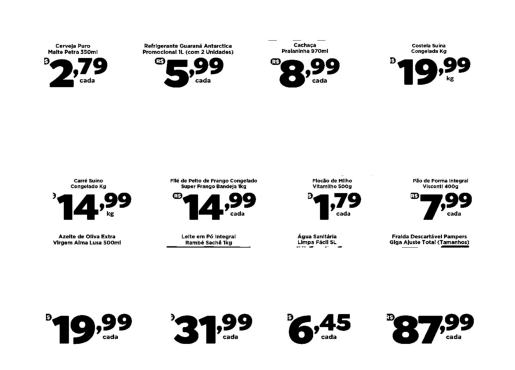

In [5]:
img = cv2.imread('./imagens/imagem_resultado_processamento.jpg')
plt.axis('off')
plt.imshow(img, cmap='gray');

### Extração de caracteres

> Para realizar a extração de caracteres e reconhecer o nome dos produtos usou-se o Pytesseract e o treinamento de redes neurais convolucionais. A imagem já encontra-se no formato adequado para ser reconhecida, ou seja, objeto de interesse na cor preta e fundo branco. 

**Reconhecimento de Texto com Pytesseract**

In [17]:
def print_texto_pyt(img):
    """Exibe o texto extraído da imagem
    Args:
        img: Imagem a ser processada
    Returns:
        None
    """
    print(f'Texto Extraído:\n\n{pytesseract.image_to_string(img)}')

In [26]:
print_texto_pyt(img)

Texto Extraído:

Cerveja Puro Refrigerante Guarand Antarctica
an 7 79 — us '9 2 a

19 99

Carré Suino Filé de Pelto de Frango Congelado
Congelade Kg on Frango 19 9

4,99 9!

Azelte de Oliva Extra Lelte em Pé Integral
Virgem Alma Lusa 500m! Itambé Saché 1kg

DB.

99 99

Cachaca
Praianinha 970m1

“@,99

cada

Flocdo de Milho
Vitamitho 79

hd

Agua Sanitaria
Limpa Facil SL

cada

Costeta Suina
Congelada Kg

Po de Forma Integral
Viscontl 99

,99

Fralda Descartavel Pampers
Glga Ajuste Total (Tamanhos)

199



**Destacar a área de interesse**

In [18]:
def roi_pyt(img, coord):
    """Realiza a segmentação da imagem de acordo com o ROI desejado
    Args:
        img: Imagem a ser processada
        coord: coordenadas referentes a x, y, w, h
        
    Returns:
        bordas: Imagem Redmensionada
    """
    img_copy = img.copy()

    x, y, w, h = coord

    # Cortar a imagem
    roi = img_copy[y:y+h, x:x+w]

    # Redimensionar a imagem
    imagem_redimensionada = cv2.resize(roi, (w, h))

    print_texto_pyt(imagem_redimensionada)
    
    plt.axis('off')
    plt.imshow(imagem_redimensionada, cmap='gray');
    
    return imagem_redimensionada

Texto Extraído:

Refrigerante Guarana Antarctica
Promoclonal 1L (com 2 Unidades)



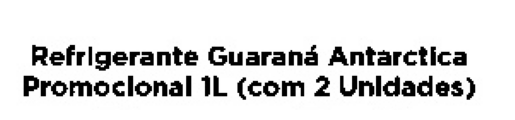

In [21]:
imagem_redimensionada1 = roi_pyt(img, (380, 80, 290, 59))

Texto Extraído:

Cerveja Puro
Malte Petra 350m!



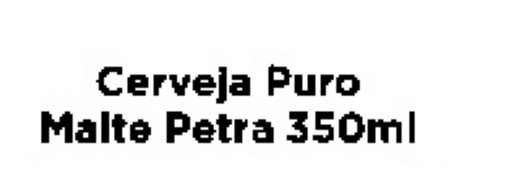

In [19]:
imagem_redimensionada2 = roi_pyt(img, (100, 80, 190, 59))

Texto Extraído:

Carré Suino
Congelado Kg



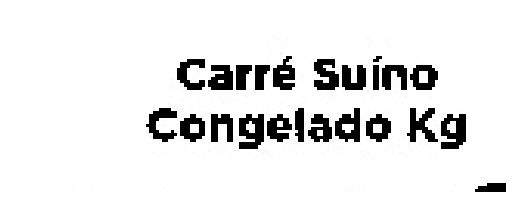

In [23]:
imagem_redimensionada3 = roi_pyt(img, (133, 480, 160, 59))

Texto Extraído:

Refrigerante Guarana Antarctica
oD 1 9 2 1S”

99



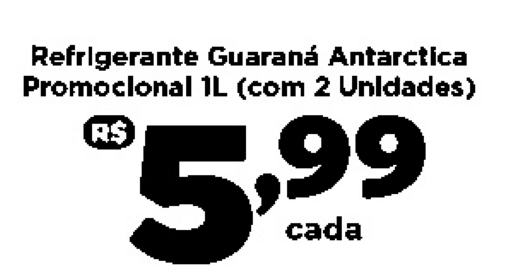

In [25]:
imagem_redimensionada4 = roi_pyt(img, (380, 80, 290, 150))

* O Pytesseract não mostrou-se tão eficiente ao extrair os dígitos referente ao preço dos produtos. Logo, para fazer a extração dos dígitos dos preços dos produtos texto será utilizada uma Rede Neural Convolucional.